In [1]:
from IPython.display import Latex

%matplotlib notebook
import matplotlib.pyplot as plt # plotting library
import numpy as np              # vector and matrix manipulation library

In [2]:
def k2_1d(x, e):
    return 2*e - x**2

def NumerovHo_1d(x, e, parity="odd"):
    """
    Numerov method for harmonic oscillator SE over the range x at energy e
    Params:
        x      : np.array
        e      : float
        parity : string (either "odd" or "even")
    Return:
        psi : np.array
    """
    
    # number of steps
    n = len(x)
    # step's width
    h = (x[-1] - x[0]) / n
    
    psi = np.zeros(n)
    
    # even solutions
    if parity == "even":
        psi[0] = 1      # x0
        psi[1] = 1-1e-4 # x1
    
    # odd solutions
    if parity == "odd":
        psi[0] = 0      # x0
        psi[1] = 1e-4   # x1

    # iterate over x range
    for i in range(2, n):
        # Numerov formula
        psi[i] = psi[i-1]*(2-5*h**2*k2_1d(x[i-1],e)/6) - psi[i-2]*(1+h**2*k2_1d(x[i-2],e)/12)
        psi[i] = psi[i] / (1 + h**2*k2_1d(x[i],e)/12)
    
    return psi

In [3]:
def secNumerovHo_1d(e_min, e_max, x):
    """
    Find buond state within e_min and e_max by finding the zero of psi(e, x_n)
    by the secant method with an accuracy epsilon = 0.001
    Params:
        e_min : float
        e_max : float
        x     : np.array
    Return:
        E       : float
        delta_E : float
    """
    # accuracy
    epsilon = 1e-5
    # psi(x_n, e_max) and psi(x_n, e_min)
    psi_max = NumerovHo_1d(x, e_max, parity)[-1]
    psi_min = NumerovHo_1d(x, e_min, parity)[-1]

    # secant method
    while (e_max - e_min) > epsilon:
        # generate next point and compute psi(e, x_n)
        e = e_max - (e_max - e_min) / (psi_max - psi_min) * psi_max
        psi_e = NumerovHo_1d(x, e, parity)[-1]
        
        # check next interval boundaries and update values
        if psi_e * psi_max < 0:
            e_min = e
            psi_min = psi_e
        else:
            e_max = e
            psi_max = psi_e

    return (e_max + e_min) / 2

# Even solutions

<IPython.core.display.Javascript object>


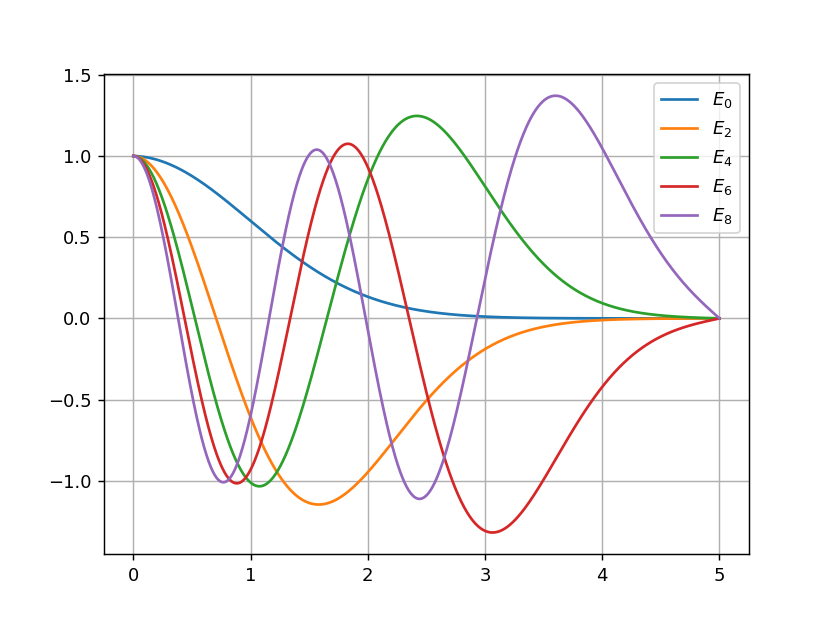

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
E = np.linspace(0, 10, 500)
x = np.linspace(0, 5, 1000)

parity = "even"
plt.figure()

# save psi(x_n)
psi_n = np.zeros(len(E))
# iterate over values of energy
for i, e in enumerate(E):
    psi = NumerovHo_1d(x, e, parity)
    psi_n[i] = psi[-1]
    
E_bs = []
for i in range(1, len(psi_n)):
    if psi_n[i]*psi_n[i-1] < 0:
        E_bs.append(secNumerovHo_1d(E[i-1], E[i], x))

for e, i in zip(E_bs, [0,2,4,6,8]):
    display(Latex(f'$E_{i} = {e:.4f}$'))
    plt.plot(x, NumerovHo_1d(x, e, parity), label=f'$E_{i}$')
    
plt.legend()
plt.grid()
# pp.savefig()
plt.show()

# Odd solutions

<IPython.core.display.Javascript object>


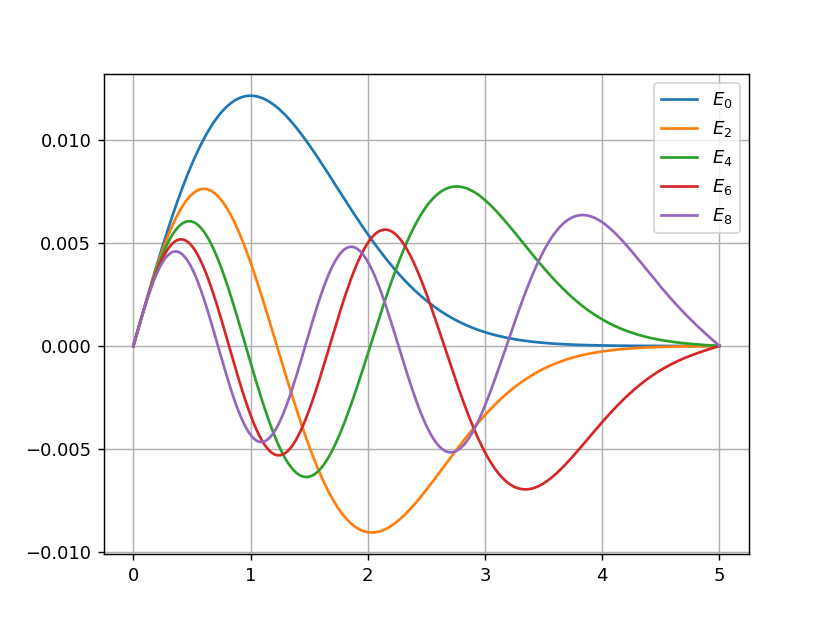

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
E = np.linspace(0, 10, 51)
x = np.linspace(0, 5, 1000)

parity = "odd"
plt.figure()

# save psi(x_n)
psi_n = np.zeros(len(E))
# iterate over values of energy
for i, e in enumerate(E):
    psi = NumerovHo_1d(x, e, parity)
    psi_n[i] = psi[-1]
    
E_bs = []
for i in range(1, len(psi_n)):
    if psi_n[i]*psi_n[i-1] < 0:
        E_bs.append(secNumerovHo_1d(E[i-1], E[i], x))

for e, i in zip(E_bs, [0,2,4,6,8]):
    display(Latex(f'$E_{i} = {e:.4f}$'))
    plt.plot(x, NumerovHo_1d(x, e, parity), label=f'$E_{i}$')
    
plt.legend()
plt.grid()
plt.show()

# 3D dimension problem

In [24]:
def k2(r, e, l):
    return 2*e - r**2 - l*(l+1)/r**2

def NumerovHo(r, e, l=0):
    """
    Numerov method for harmonic oscillator SE over the range r at energy e
    Params:
        r      : np.array
        e      : float
        parity : string (either "odd" or "even")
    Return:
        psi : np.array
    """
    
    # number of steps
    n = len(r)
    # step's width
    h = (r[-1] - r[0]) / n
    
    psi = np.zeros(n)
    
    psi[0] = 0
    psi[1] = r[1]**(l+1)

    # iterate over r range
    for i in range(2, n):
        # Numerov formula
        psi[i] = psi[i-1]*(2-5*h**2*k2(r[i-1],e,l)/6) - psi[i-2]*(1+h**2*k2(r[i-2],e,l)/12)
        psi[i] = psi[i] / (1 + h**2*k2(r[i],e,l)/12)
    
    return psi

In [25]:
def secNumerovHo(e_min, e_mar, r, l):
    """
    Find buond state within e_min and e_mar by finding the zero of psi(e, r_n)
    by the secant method with an accuracy epsilon = 0.001
    Params:
        e_min : float
        e_mar : float
        r     : np.array
    Return:
        E       : float
        delta_E : float
    """
    # accuracy
    epsilon = 1e-5
    # psi(r_n, e_mar) and psi(r_n, e_min)
    psi_mar = NumerovHo(r, e_mar, l)[-1]
    psi_min = NumerovHo(r, e_min, l)[-1]

    # secant method
    while (e_mar - e_min) > epsilon:
        # generate nert point and compute psi(e, r_n)
        e = e_mar - (e_mar - e_min) / (psi_mar - psi_min) * psi_mar
        psi_e = NumerovHo(r, e, l)[-1]
        
        # check nert interval boundaries and update values
        if psi_e * psi_mar < 0:
            e_min = e
            psi_min = psi_e
        else:
            e_mar = e
            psi_mar = psi_e

    return (e_mar + e_min) / 2

<IPython.core.display.Javascript object>


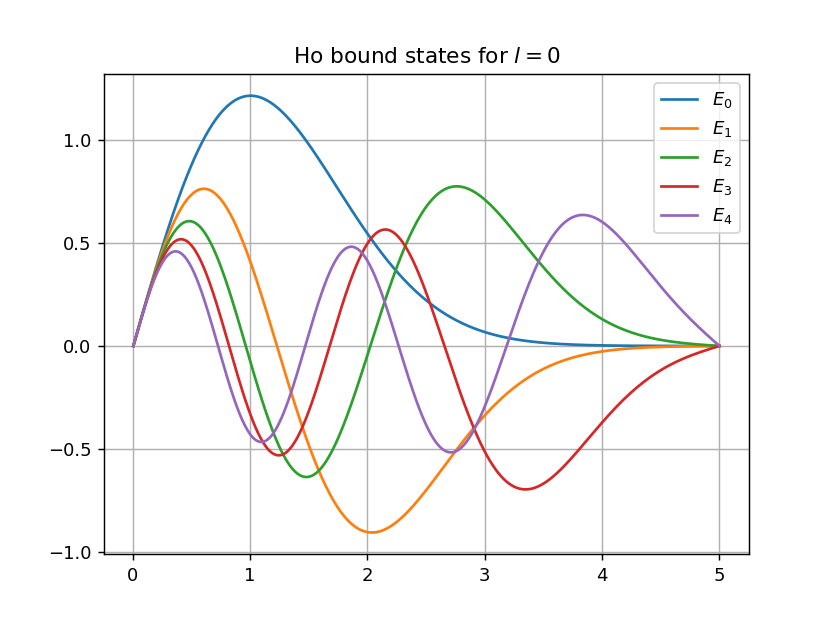

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


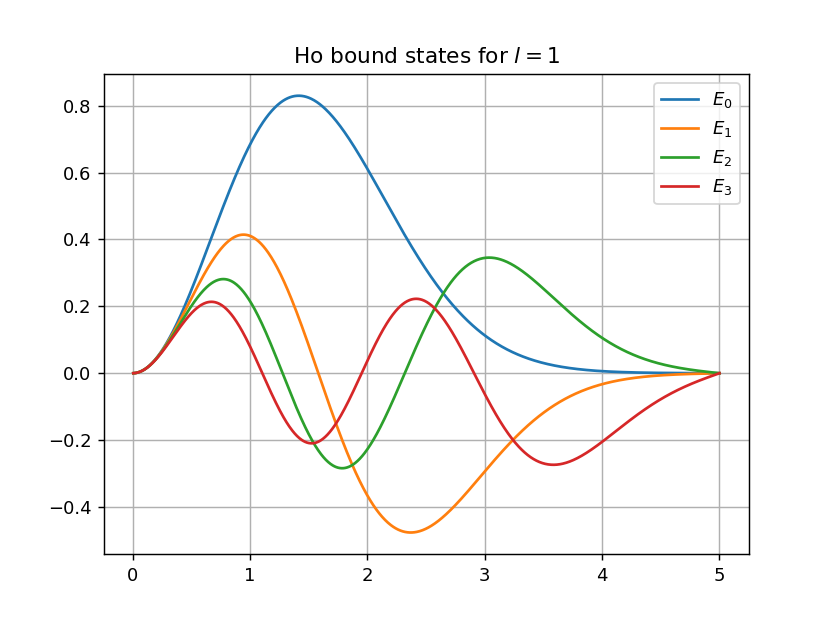

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


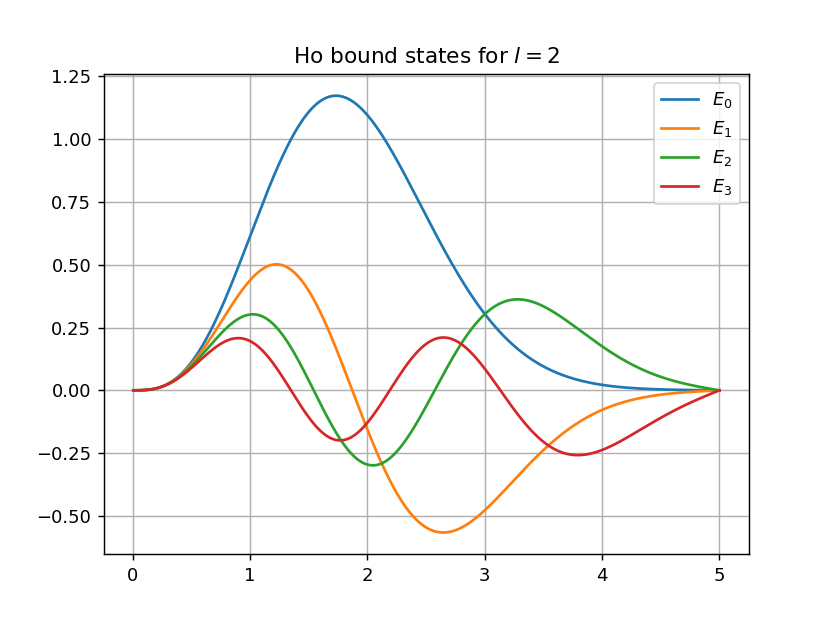

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


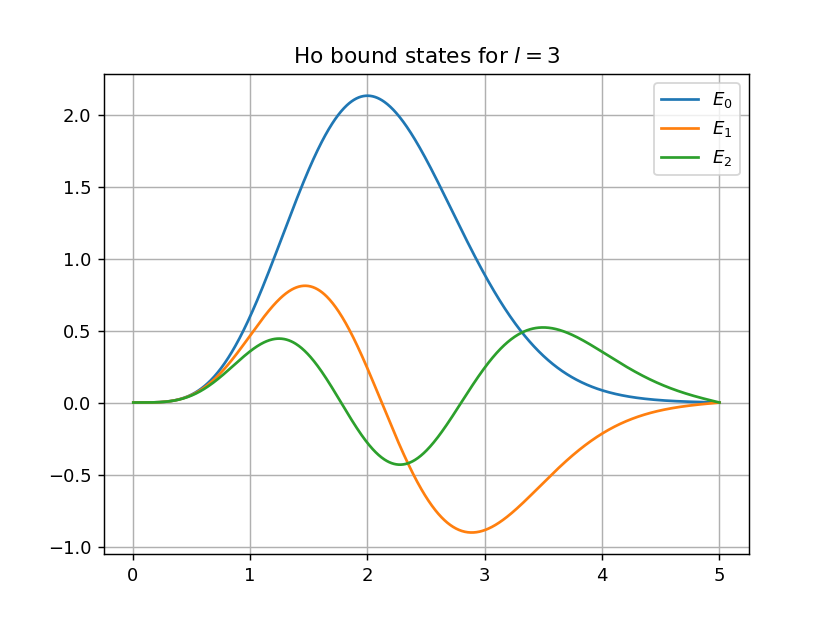

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


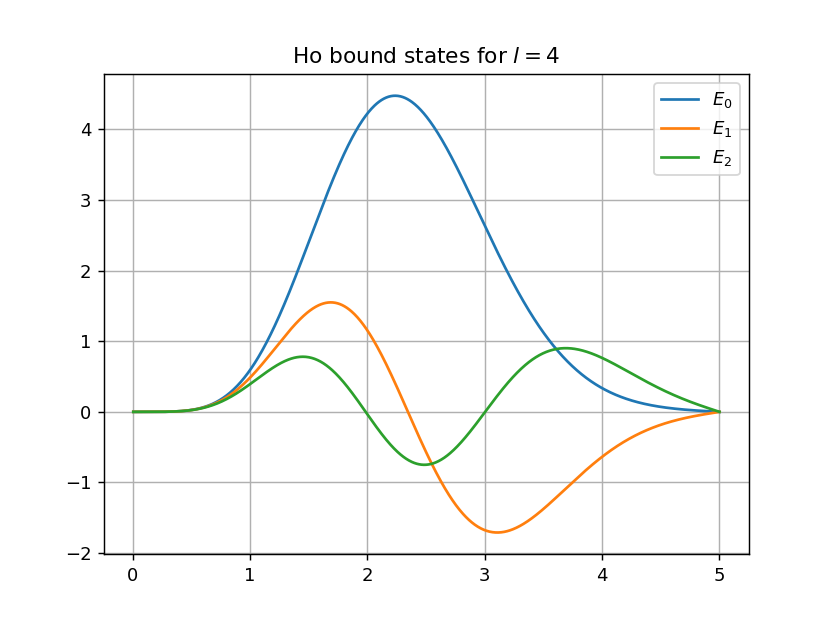

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [27]:
E = np.linspace(0, 10, 51)
r = np.linspace(5e-3, 5, 1000)

for l in range(5):
    plt.figure()

    # save psi(r_n)
    psi_n = np.zeros(len(E))
    # iterate over values of energy
    for i, e in enumerate(E):
        psi = NumerovHo(r, e, l)
        psi_n[i] = psi[-1]

    E_bs = []
    for i in range(1, len(psi_n)):
        if psi_n[i]*psi_n[i-1] < 0:
            E_bs.append(secNumerovHo(E[i-1], E[i], r, l))

    for i, e in enumerate(E_bs):
        display(Latex(f'$E_{i} = {e:.4f}$'))
        plt.plot(r, NumerovHo(r, e, l), label=f'$E_{i}$')

    plt.title(f"Ho bound states for $l={l}$")
    plt.legend()
    plt.grid()
    plt.show()